In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [134]:
df_clinical = pd.read_csv('data/ab_clinical_data.csv')
df_clinical.replace('-', 0, inplace=True)

In [135]:
df_clinical

,Antibody,Study ID,Checkpoint,Trial Phase,Participants,OS,PFS,ORR,Link,OS_norm,PFS_norm,ORR_norm,Composite_score
0,ATEZOLIZUMAB,NCT02928406,PD-L1,3,1004,8.57,2.2,0,https://clinicaltrials.gov/study/NCT02928406?i...,0.136409,0.029740,0.000000,0.166269
1,ATEZOLIZUMAB,NCT03811002,PD-L1,3,274,31.1,12.1,60.2,NaN,0.698254,0.397770,0.781671,1.526774
2,DURVALUMAB,NCT02125461,PD-L1,3,476,34.7,28.3,30,https://clinicaltrials.gov/study/NCT02125461?i...,0.788030,1.000000,0.374663,1.930938
3,DURVALUMAB,NCT04449861,PD-L1,3,165,14.8,6.3,76.4,NaN,0.291771,0.182156,1.000000,1.090759
4,AVELUMAB,NCT02603432,PD-L1,3,350,21.4,5.5,12.3,https://clinicaltrials.gov/study/NCT02603432?c...,0.456359,0.152416,0.136119,0.631995
5,AVELUMAB,NCT02684006,PD-L1,3,270,43.2,13.8,0,https://clinicaltrials.gov/study/NCT02684006?c...,1.000000,0.460967,0.000000,1.184829
6,AVELUMAB,NCT02580058,PD-L1,3,188,11.8,1.9,3.7,https://clinicaltrials.gov/study/NCT02580058?c...,0.216958,0.018587,0.020216,0.194076
7,AVELUMAB,NCT02576574,PD-L1,3,151,20.1,8.4,0,https://clinicaltrials.gov/study/NCT02576574?t...,0.423940,0.260223,0.000000,0.497579
8,AVELUMAB,NCT02625623,PD-L1,3,185,4.6,1.4,2.2,https://clinicaltrials.gov/study/NCT02625623?c...,0.037406,0.000000,0.000000,0.028298
9,AVELUMAB,NCT02395172,PD-L1,3,264,11.4,3.4,0,https://clinicaltrials.gov/study/NCT02395172?c...,0.206983,0.074349,0.000000,0.227246


In [136]:
grouped = df_clinical.groupby(['Antibody', 'Checkpoint']).agg({
    'Composite_score': 'mean',
    'Participants': 'sum'
}).reset_index()

grouped

,Antibody,Checkpoint,Composite_score,Participants
0,ATEZOLIZUMAB,PD-L1,0.846522,1278
1,AVELUMAB,PD-L1,0.440370,1657
2,CEMIPLIMAB,PD-1,0.386985,304
3,DOSTARLIMAB,PD-1,0.002428,49
4,DURVALUMAB,PD-L1,1.510848,641
5,IPILIMUMAB,CTLA-4,0.534807,521
6,NIVOLUMAB,PD-1,0.762266,792
7,PEMBROLIZUMAB,PD-1,0.960211,845
8,TERMELIMUMAB,CTLA-4,0.119496,1114
9,TISLELIZUMAB,PD-1,1.012841,450


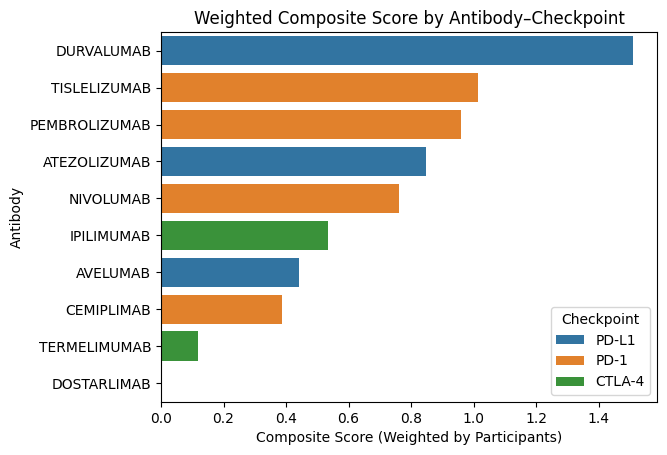

In [137]:
sns.barplot(data=grouped.sort_values('Composite_score', ascending=False),
            x='Composite_score', y='Antibody', hue='Checkpoint')
plt.title('Weighted Composite Score by Antibody–Checkpoint')
plt.xlabel('Composite Score (Weighted by Participants)')
plt.show()

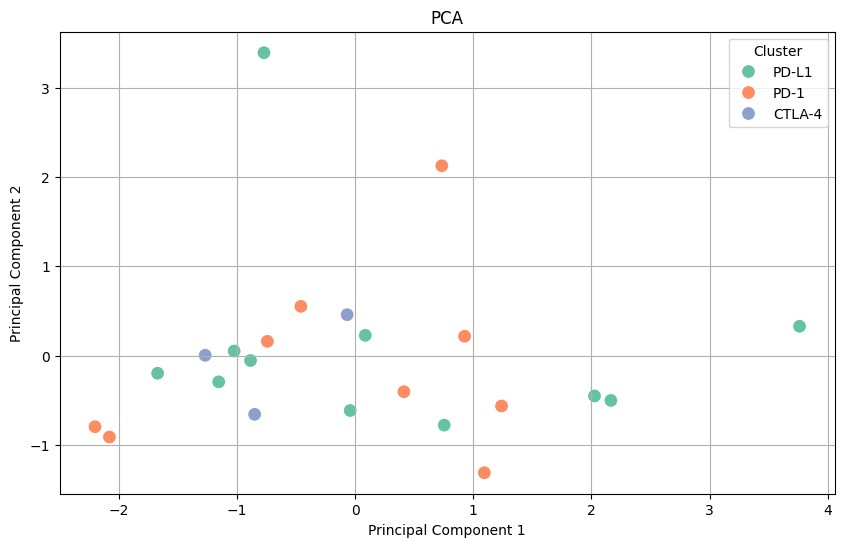

In [138]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

features = df_clinical[['OS', 'PFS', 'ORR', 'Participants']].dropna()
scaled = StandardScaler().fit_transform(features)


# Reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Add PCA coordinates and cluster labels to a new DataFrame
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Composite_score'] = df_clinical.loc[features.index, 'Composite_score'].values 
df_pca['Antibody'] = df_clinical.loc[features.index, 'Antibody'].values  # optional for labeling

df_pca['Checkpoint'] = df_clinical.loc[features.index, 'Checkpoint'].values  # optional for labeling

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Checkpoint', palette='Set2', s=100)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [139]:
top = grouped.sort_values('Composite_score', ascending=False).head(5)
bottom = grouped.sort_values('Composite_score').head(5)

print("Top performers:\n", top)
print("\nWorst performers:\n", bottom)

Top performers:
         Antibody Checkpoint  Composite_score  Participants
4     DURVALUMAB      PD-L1         1.510848           641
9   TISLELIZUMAB       PD-1         1.012841           450
7  PEMBROLIZUMAB       PD-1         0.960211           845
0   ATEZOLIZUMAB      PD-L1         0.846522          1278
6      NIVOLUMAB       PD-1         0.762266           792

Worst performers:
        Antibody Checkpoint  Composite_score  Participants
3   DOSTARLIMAB       PD-1         0.002428            49
8  TERMELIMUMAB     CTLA-4         0.119496          1114
2    CEMIPLIMAB       PD-1         0.386985           304
1      AVELUMAB      PD-L1         0.440370          1657
5    IPILIMUMAB     CTLA-4         0.534807           521


In [140]:
binding_data = pd.read_csv('structural_paratope_all_information.csv')
binding_data

,num_hydrogen_bonds,num_salt_bridges,paratope_area,pdb_id,binding_score,pdb_base,cluster
0,0.106796,0.000000,0.618800,6txz,0.166478,6txz,TIM3
1,0.053398,0.000000,0.336553,5tru,0.088670,5tru,CTLA-4
2,0.111650,0.000000,0.769530,5b8c,0.198566,5b8c,PD-1
3,0.097087,0.000000,0.482986,5x8l,0.135432,5x8l,PD-L1
4,0.038835,0.666667,0.198832,7su1,0.321967,7su1,CTLA-4
5,1.000000,1.000000,0.731195,9dq4,0.946239,9dq4,CTLA-4
6,0.067961,0.333333,0.662355,6xkr,0.292989,6xkr,PD-1
7,0.097087,0.000000,0.420264,5xj4,0.122888,5xj4,PD-L1
8,0.043689,0.333333,0.313391,7su0,0.213487,7su0,CTLA-4
9,0.048544,0.333333,0.353904,7wvm,0.223532,7wvm,PD-1


In [141]:
# Filter out necessary columns
# Define datasets for individual inhibitory checkpoints
data = pd.read_csv('data/ab_ag.tsv', sep='\t')
pd1 = data[data['compound'].str.contains('PD-1', na=False)]
pdl1 = data[data['compound'].str.contains('PD-L1', na=False)]
ctla4 = data[data['compound'].str.contains('CTLA-4', na=False)]
kir = data[data['compound'].str.contains('KIR', na=False)]
lag3 = data[data['compound'].str.contains('LAG', na=False)]
tim3 = data[data['compound'].str.contains('TIM3', na=False)]


pd1 = pd1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
pdl1 = pdl1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
ctla4 = ctla4[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
kir = kir[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
lag3 = lag3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
tim3 = tim3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]


combined_dataset = [pdl1, pd1, ctla4, kir, lag3, tim3]

# Shuffle the list randomly
random.shuffle(combined_dataset)

# Concatenate them in the new random order
merged_df = pd.concat(combined_dataset, ignore_index=True)
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

shuffled_df = shuffled_df[shuffled_df['resolution'] < 3.5]
shuffled_df = shuffled_df.dropna()

# 1. Filter all relevant rows: those with 'mab' OR 'M6903'
ab_mask = shuffled_df['compound'].str.contains('mab|M6903', na=False, case=False)
shuffled_df_ab = shuffled_df[ab_mask]

# 2. Extract antibody names
shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)

# 3. Fill in M6903 manually where missing
m6903_mask = shuffled_df_ab['compound'].str.contains('M6903', na=False)
shuffled_df_ab.loc[m6903_mask, 'antibody'] = shuffled_df_ab.loc[m6903_mask, 'antibody'].fillna('M6903')

# # 4. Extract checkpoint names
checkpoints_pattern = r'\b(PD-1|PD-L1|CTLA-4|KIR2DL3|TIM3)\b'
shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)

# # 5. Final formatting
shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

shuffled_df_ab

/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_1966/1115545402.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)
/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipykernel_1966/1115545402.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)
/var/folders/53/7nzjfc950dz9z0q174xdmhj00000gn/T/ipy

,pdb,Hchain,Lchain,antigen_chain,antigen_type,antigen_name,compound,resolution,method,antibody,checkpoint
0,7cgw,A,B,C,protein,programmed cell death protein 1,Complex structure of PD-1 and tislelizumab Fab,3.200,X-RAY DIFFRACTION,TISLELIZUMAB,PD-1
1,5b8c,H,G,I,protein,programmed cell death protein 1,High resolution structure of the human PD-1 in...,2.146,X-RAY DIFFRACTION,PEMBROLIZUMAB,PD-1
3,5ggr,A,B,Y,protein,programmed cell death protein 1,PD-1 in complex with nivolumab Fab,3.300,X-RAY DIFFRACTION,NIVOLUMAB,PD-1
4,6k0y,A,B,C,protein,programmed cell death protein 1,Study of the interactions of a novel monoclona...,1.700,X-RAY DIFFRACTION,NaN,NaN
5,6txz,K,O,D,protein,hepatitis a virus cellular receptor 2,FAB PART OF M6903 IN COMPLEX WITH HUMAN TIM3,3.060,X-RAY DIFFRACTION,M6903,TIM3
6,5wt9,H,L,G,protein,programmed cell death protein 1,Complex structure of PD-1 and nivolumab-Fab,2.401,X-RAY DIFFRACTION,NIVOLUMAB,PD-1
7,7wvm,A,B,E,protein,programmed cell death protein 1,The complex structure of PD-1 and cemiplimab,3.400,X-RAY DIFFRACTION,CEMIPLIMAB,PD-1
9,5jxe,D,C,B,protein,programmed cell death protein 1,Human PD-1 ectodomain complexed with Pembroliz...,2.900,X-RAY DIFFRACTION,PEMBROLIZUMAB,PD-1
11,8gy5,A,B,Q,protein,programmed cell death protein 1,High-resolution structure of the cemiplimab Fa...,1.980,X-RAY DIFFRACTION,CEMIPLIMAB,PD-1
12,7cu5,A,A,Q,protein,programmed cell death protein 1,N-Glycosylation of PD-1 and glycosylation depe...,2.810,X-RAY DIFFRACTION,CAMRELIZUMAB,PD-1


In [142]:
# Filter and concatenate the best performers into one clean DataFrame
best_ab_names = ['DURVALUMAB', 'TISLELIZUMAB', 'PEMBROLIZUMAB', 'ATEZOLIZUMAB', 'NIVOLUMAB']

best_performers = pd.concat([
    shuffled_df_ab[shuffled_df_ab['antibody'] == ab]
    for ab in best_ab_names
], ignore_index=True)

# Optional: Display or print
best_performers['pdb'].unique()

array(['5x8m', '5xj4', '7cgw', '7bxa', '5b8c', '5jxe', '5ggs', '5x8l',
       '5xxy', '5ggr', '5wt9'], dtype=object)

In [143]:
# Filter and concatenate the worst performers into one clean DataFrame
worst_ab_names = ['DOSTARLIMAB', 'TERMELIMUMAB', 'CEMIPLIMAB', 'AVELUMAB', 'IPILIMUMAB']

worst_performers = pd.concat([
    shuffled_df_ab[shuffled_df_ab['antibody'] == ab]
    for ab in worst_ab_names
], ignore_index=True)

# Optional: Display or print
worst_performers['pdb'].unique()

array(['7wsl', '7wvm', '8gy5', '5grj', '6rp8', '5tru', '5xj3', '7su0',
       '9dq3', '7su1', '9dq4'], dtype=object)

In [144]:
worst_binding_data = binding_data[binding_data['pdb_base'].isin(best_performers['pdb'].unique())]

# Merge on pdb ID
merged_binding = best_binding_data.merge(
    best_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_base',
    right_on='pdb'
)

merged_binding.drop_duplicates()

sns.barplot(data=merged_binding,
            x='pdb_id', y='paratope_area', hue='antibody')

KeyError: 'pdb_base'

<Axes: xlabel='pdb_id', ylabel='paratope_area'>

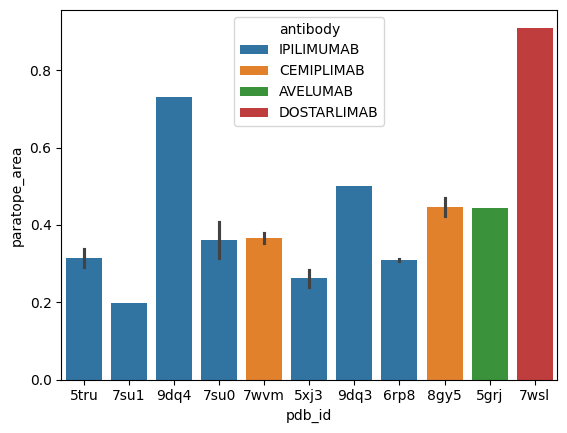

In [ ]:
worst_binding_data = binding_data[binding_data['pdb_base'].isin(worst_performers['pdb'].unique())]

# Merge on pdb ID
merged_binding = worst_binding_data.merge(
    worst_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_base',
    right_on='pdb'
)

merged_binding.drop_duplicates()

sns.barplot(data=merged_binding,
            x='pdb_id', y='paratope_area', hue='antibody')

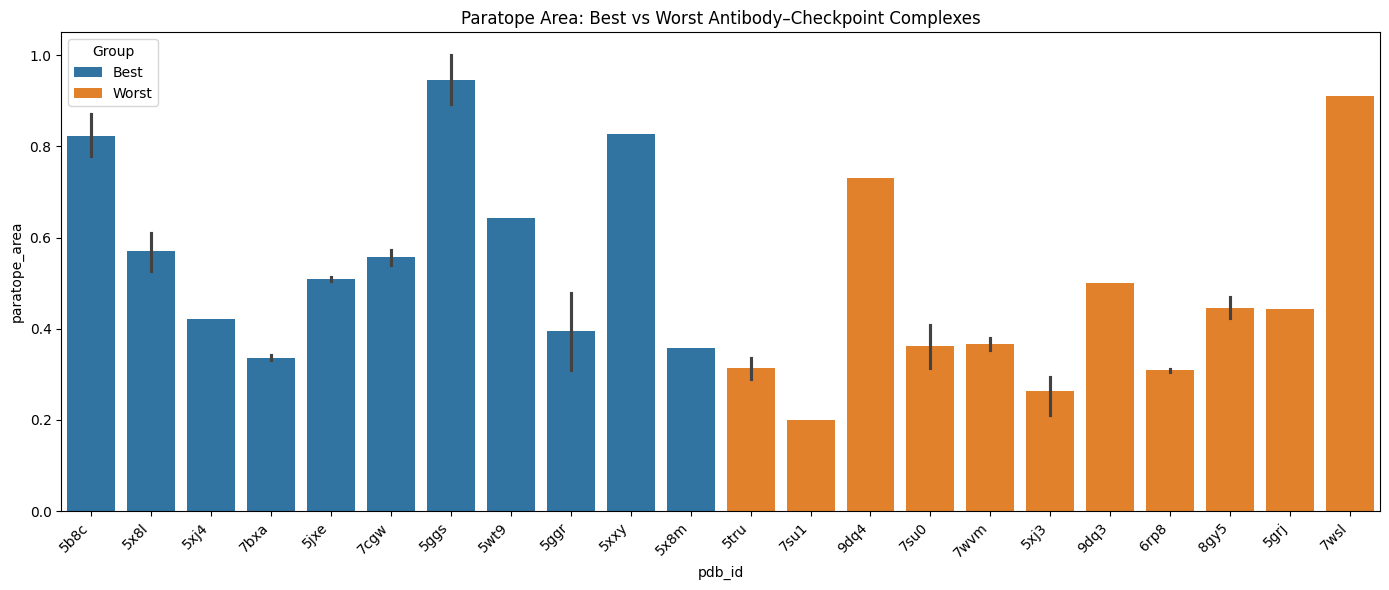

In [ ]:
# BEST
best_binding_data = binding_data[binding_data['pdb_base'].isin(best_performers['pdb'].unique())]
merged_best = best_binding_data.merge(
    best_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_base',
    right_on='pdb'
)
merged_best['Group'] = 'Best'

# WORST
worst_binding_data = binding_data[binding_data['pdb_base'].isin(worst_performers['pdb'].unique())]
merged_worst = worst_binding_data.merge(
    worst_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_base',
    right_on='pdb'
)
merged_worst['Group'] = 'Worst'

# Combine both
merged_all = pd.concat([merged_best, merged_worst], ignore_index=True)

# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'paratope_area'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='paratope_area', hue='Group')

plt.xticks(rotation=45, ha='right')
plt.title('Paratope Area: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

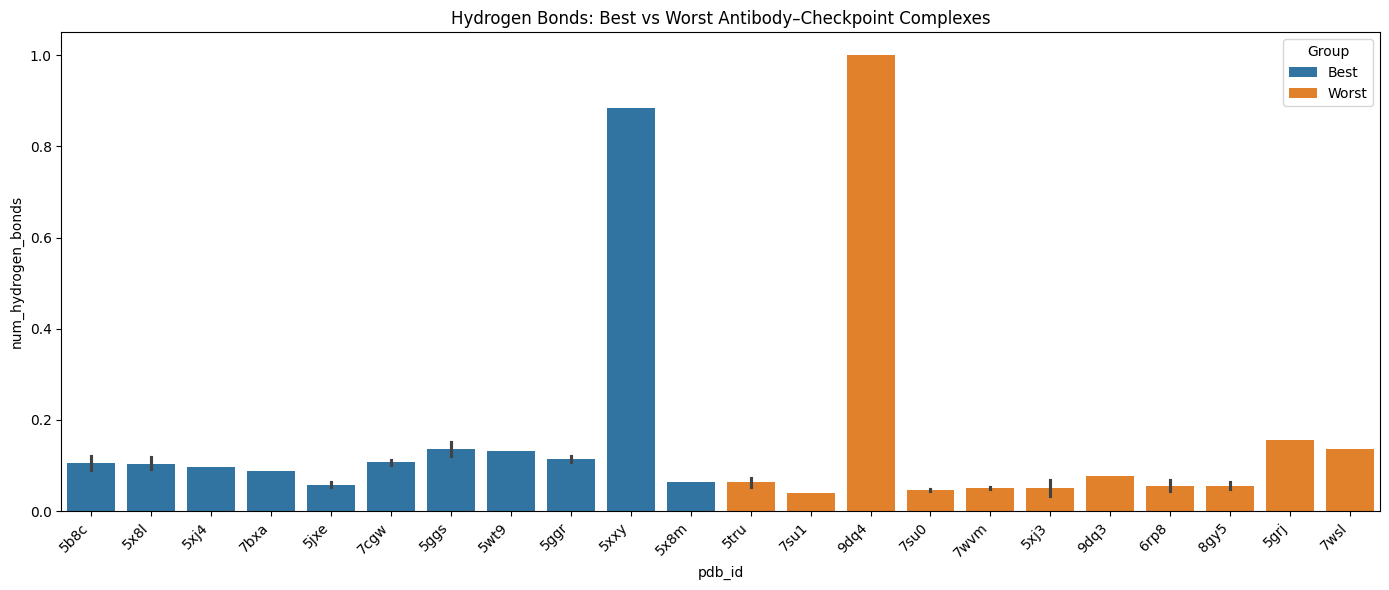

In [ ]:
# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'num_hydrogen_bonds'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='num_hydrogen_bonds', hue='Group')

plt.xticks(rotation=45, ha='right')
plt.title('Hydrogen Bonds: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

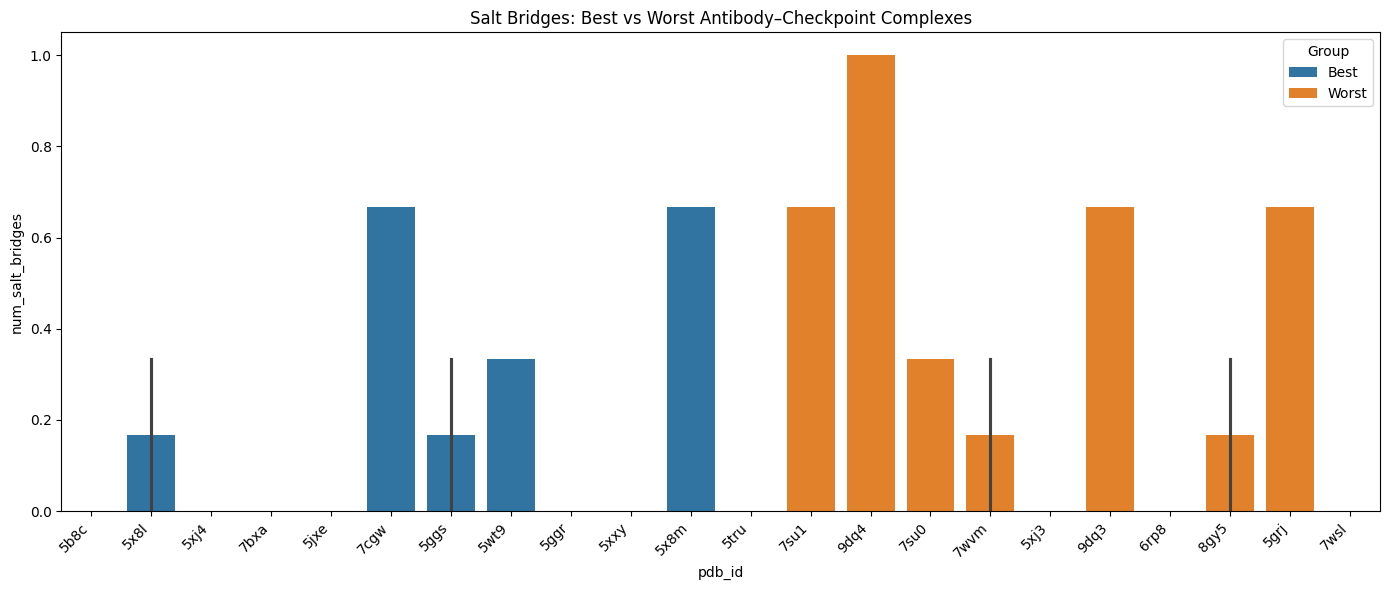

In [ ]:
# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'num_salt_bridges'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='num_salt_bridges', hue='Group')

plt.xticks(rotation=45, ha='right')
plt.title('Salt Bridges: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

In [ ]:
epitope_data = pd.read_csv('epitope_surface_hbonds_saltbridges_summary.csv')

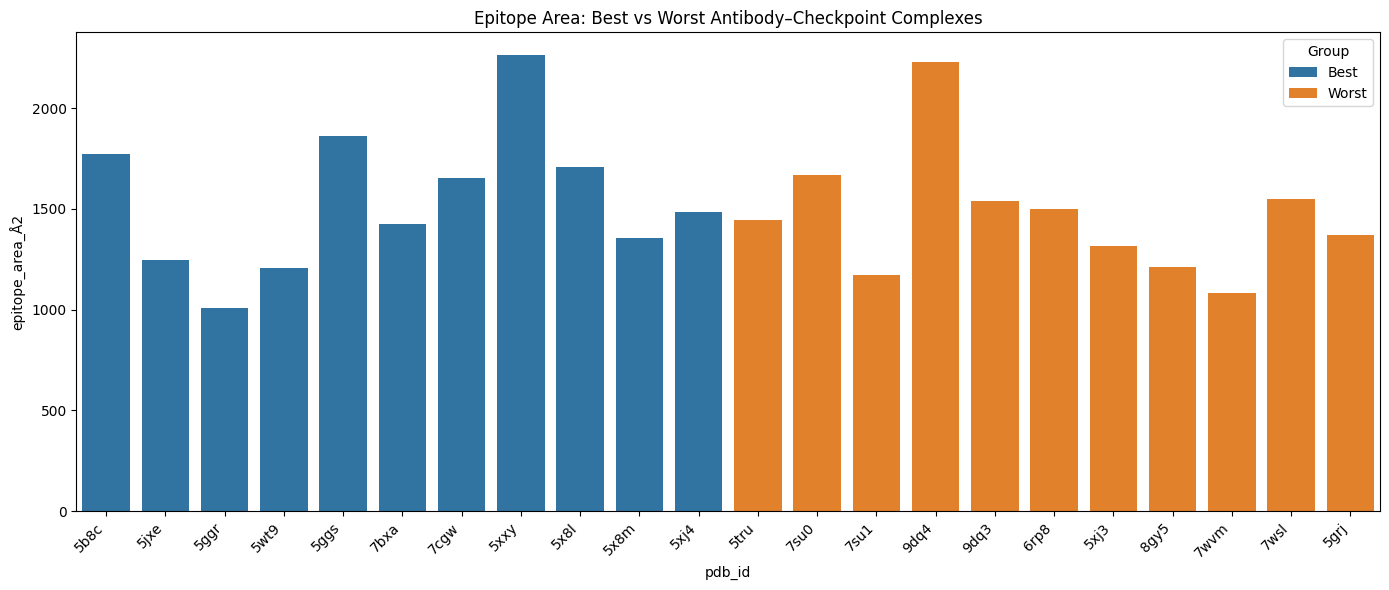

In [ ]:
# BEST
best_binding_data = epitope_data[epitope_data['pdb_id'].isin(best_performers['pdb'].unique())]
merged_best = best_binding_data.merge(
    best_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)
merged_best['Group'] = 'Best'

# WORST
worst_binding_data = epitope_data[epitope_data['pdb_id'].isin(worst_performers['pdb'].unique())]
merged_worst = worst_binding_data.merge(
    worst_performers[['pdb', 'antibody']],
    how='left',
    left_on='pdb_id',
    right_on='pdb'
)
merged_worst['Group'] = 'Worst'

# Combine both
merged_all = pd.concat([merged_best, merged_worst], ignore_index=True)

# Optional: clean duplicates
merged_all = merged_all.drop_duplicates(subset=['pdb_id', 'epitope_area_Å2'])

# Barplot — grouped by Group (best/worst)
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_all,
            x='pdb_id', y='epitope_area_Å2', hue='Group')

plt.xticks(rotation=45, ha='right')
plt.title('Epitope Area: Best vs Worst Antibody–Checkpoint Complexes')
plt.tight_layout()
plt.show()

In [149]:
# files = [
#     'data/ctla4/ctla4_paratope_residue_frequencies_pivot.csv',
#     'data/kir/kir_paratope_residue_frequencies_pivot.csv',
#     'data/pdl1/pdl1_paratope_residue_frequencies_pivot.csv',
#     'data/pd1/pd1_paratope_residue_frequencies_pivot.csv',
#     'data/tim3/tim3_paratope_residue_frequencies_pivot.csv',
#     'data/lag3/lag3_paratope_residue_frequencies_pivot.csv'
# ]

files = [
    'data/ctla4/ctla4_residue_frequencies_pivot.csv',
    'data/kir/kir_residue_frequencies_pivot.csv',
    'data/pdl1/pdl1_residue_frequencies_pivot.csv',
    'data/pd1/pd1_residue_frequencies_pivot.csv',
    'data/tim3/tim3_residue_frequencies_pivot.csv',
    'data/lag3/lag3_residue_frequencies_pivot.csv'
]

# Read all CSVs into a list of DataFrames
dfs = [pd.read_csv(f) for f in files]

# Concatenate them
residue_df = pd.concat(dfs, ignore_index=True)


# Reshape: from wide to long format
residue_long = residue_df.melt(
    id_vars='residue_name',
    var_name='pdb_id',
    value_name='count'
)

# Remove the 'mean' row if needed
residue_long = residue_long[residue_long['pdb_id'] != 'mean']

In [150]:
pdb_map = merged_all[['pdb_id', 'antibody', 'Group']].drop_duplicates()
residue_long_with_ab = residue_long.merge(
    pdb_map,
    how='left',
    on='pdb_id'
)

# Drop rows where 'antibody' is missing
residue_long_with_ab = residue_long_with_ab.dropna(subset=['antibody'])

# Optional: then drop duplicates if needed
residue_long_with_ab = residue_long_with_ab.drop_duplicates()

In [151]:
heatmap_data = residue_long_with_ab.pivot_table(
    index='residue_name',  # amino acids as rows
    columns='antibody',    # antibodies as columns
    values='count',        # how many residues of each type
    aggfunc='sum',         # in case there are duplicates
    fill_value=0
)
heatmap_data

antibody,ATEZOLIZUMAB,AVELUMAB,CEMIPLIMAB,DOSTARLIMAB,DURVALUMAB,IPILIMUMAB,NIVOLUMAB,PEMBROLIZUMAB,TISLELIZUMAB
residue_name,,,,,,,,,
ALA,10.0,1.0,4.0,4.0,2.0,3.0,7.0,6.0,7.0
ARG,6.0,3.0,3.0,1.0,6.0,9.0,5.0,12.0,4.0
ASN,2.0,1.0,8.0,1.0,2.0,9.0,5.0,14.0,10.0
ASP,8.0,3.0,4.0,3.0,7.0,4.0,8.0,14.0,9.0
CYS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EDO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FLC,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
GLN,2.0,2.0,2.0,0.0,0.0,10.0,2.0,5.0,5.0
GLU,4.0,2.0,4.0,2.0,10.0,24.0,2.0,7.0,2.0


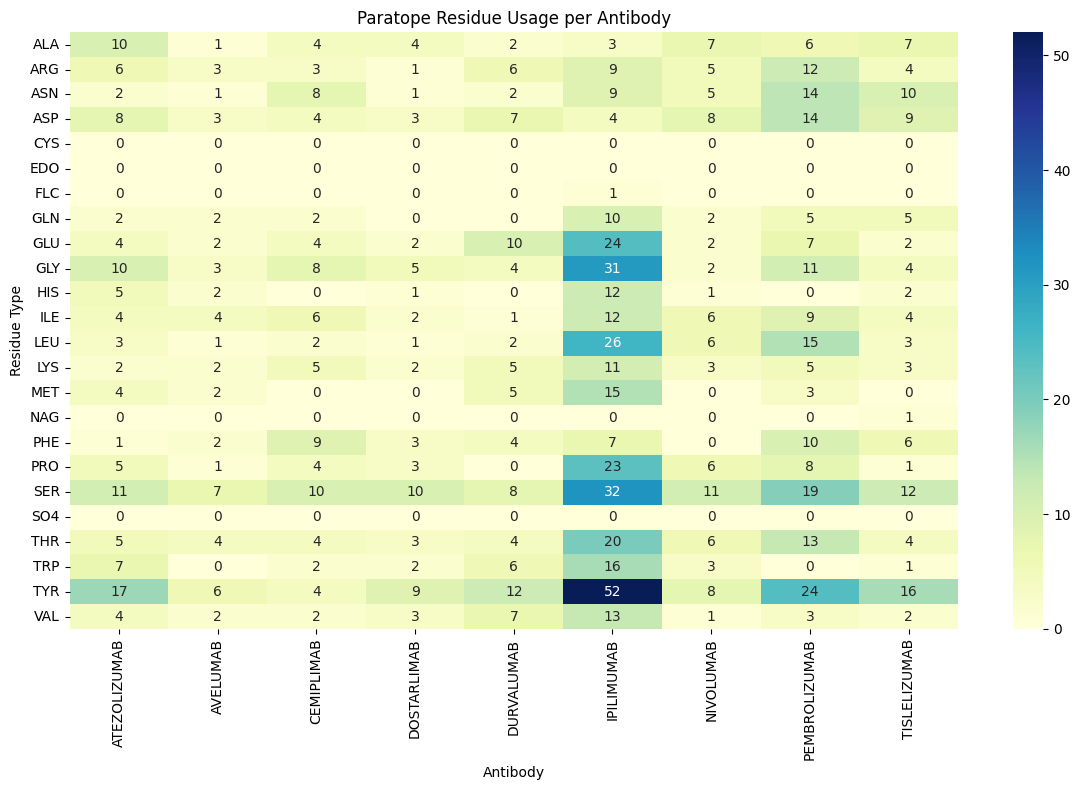

In [152]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Paratope Residue Usage per Antibody')
plt.ylabel('Residue Type')
plt.xlabel('Antibody')
plt.tight_layout()
plt.show()